In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing record 1 of Set 1 | bur gabo
City not found. Skipping...
Processing record 2 of Set 1 | russkaya polyana
Processing record 3 of Set 1 | tiksi
Processing record 4 of Set 1 | saint-augustin
Processing record 5 of Set 1 | barentsburg
City not found. Skipping...
Processing record 6 of Set 1 | mataura
Processing record 7 of Set 1 | busselton
Processing record 8 of Set 1 | clyde river
Processing record 9 of Set 1 | nosy varika
Processing record 10 of Set 1 | hilo
Processing record 11 of Set 1 | norman wells
Processing record 12 of Set 1 | attawapiskat
City not found. Skipping...
Processing record 13 of Set 1 | nantucket
Processing record 14 of Set 1 | shunyi
Processing record 15 of Set 1 | longyearbyen
Processing record 16 of Set 1 | bethel
Processing record 17 of Set 1 | albany
Processing record 18 of Set 1 | georgetown
Processing record 19 of Set 1 | beloha
Processing record 20 of Set 1 | morros
Processing record 21 of 

Processing record 35 of Set 4 | grand island
Processing record 36 of Set 4 | sao simao
Processing record 37 of Set 4 | karratha
Processing record 38 of Set 4 | lavrentiya
Processing record 39 of Set 4 | gonbad-e qabus
Processing record 40 of Set 4 | asau
Processing record 41 of Set 4 | grand gaube
Processing record 42 of Set 4 | ambilobe
Processing record 43 of Set 4 | huilong
Processing record 44 of Set 4 | puro
Processing record 45 of Set 4 | vredendal
Processing record 46 of Set 4 | tommot
Processing record 47 of Set 4 | ribeira grande
Processing record 48 of Set 4 | hammerfest
Processing record 49 of Set 4 | hervey bay
Processing record 50 of Set 4 | vestmannaeyjar
Processing record 1 of Set 5 | toftir
City not found. Skipping...
Processing record 2 of Set 5 | yulara
Processing record 3 of Set 5 | acapulco
Processing record 4 of Set 5 | poum
Processing record 5 of Set 5 | saint-philippe
Processing record 6 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing record 7 

Processing record 21 of Set 8 | panama city
Processing record 22 of Set 8 | sept-iles
Processing record 23 of Set 8 | nortelandia
Processing record 24 of Set 8 | antofagasta
Processing record 25 of Set 8 | ryotsu
Processing record 26 of Set 8 | gijon
Processing record 27 of Set 8 | kavaratti
Processing record 28 of Set 8 | ahipara
Processing record 29 of Set 8 | tazovskiy
Processing record 30 of Set 8 | beibei
Processing record 31 of Set 8 | crixas
Processing record 32 of Set 8 | sorso
Processing record 33 of Set 8 | calabozo
Processing record 34 of Set 8 | port shepstone
Processing record 35 of Set 8 | moissac
Processing record 36 of Set 8 | ribeira brava
Processing record 37 of Set 8 | cairns
Processing record 38 of Set 8 | rio verde de mato grosso
Processing record 39 of Set 8 | policoro
Processing record 40 of Set 8 | lucapa
Processing record 41 of Set 8 | fort nelson
Processing record 42 of Set 8 | mirnyy
Processing record 43 of Set 8 | changji
Processing record 44 of Set 8 | san 

Processing record 8 of Set 12 | liling
Processing record 9 of Set 12 | lajosmizse
Processing record 10 of Set 12 | channel-port aux basques
Processing record 11 of Set 12 | sakakah
Processing record 12 of Set 12 | usinsk
Processing record 13 of Set 12 | artyk
City not found. Skipping...
Processing record 14 of Set 12 | aktau
Processing record 15 of Set 12 | sorland
Processing record 16 of Set 12 | beidao
Processing record 17 of Set 12 | tayu
Processing record 18 of Set 12 | labrea
Processing record 19 of Set 12 | ruteng
Processing record 20 of Set 12 | chapais
Processing record 21 of Set 12 | damara
Processing record 22 of Set 12 | gwanda
Processing record 23 of Set 12 | cam pha
City not found. Skipping...
Processing record 24 of Set 12 | rafaela
Processing record 25 of Set 12 | saint-georges
Processing record 26 of Set 12 | erenhot
Processing record 27 of Set 12 | petropavlovka
Processing record 28 of Set 12 | aksarka
Processing record 29 of Set 12 | lindi
Processing record 30 of Set 

In [9]:
len(city_data)

554

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Russkaya Polyana,49.4170,31.9201,31.87,80,100,2.86,UA,21-11-23 20:04:46
1,Tiksi,71.6872,128.8694,-20.65,97,62,6.62,RU,21-11-23 20:04:47
2,Saint-Augustin,51.2260,-58.6502,40.44,87,100,23.49,CA,21-11-23 20:04:47
3,Mataura,-46.1927,168.8643,53.55,72,97,2.33,NZ,21-11-23 20:04:48
4,Busselton,-33.6500,115.3333,52.05,83,0,8.57,AU,21-11-23 20:04:48
5,Clyde River,70.4692,-68.5914,16.70,95,100,14.79,CA,21-11-23 20:04:48
6,Nosy Varika,-20.5833,48.5333,76.37,74,55,11.39,MG,21-11-23 20:04:49
7,Hilo,19.7297,-155.0900,80.33,74,20,4.61,US,21-11-23 20:04:18
8,Norman Wells,65.2820,-126.8329,-10.98,93,100,3.60,CA,21-11-23 20:04:49
9,Nantucket,41.2835,-70.0995,40.08,51,69,23.80,US,21-11-23 20:04:42


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Russkaya Polyana,UA,21-11-23 20:04:46,49.4170,31.9201,31.87,80,100,2.86
1,Tiksi,RU,21-11-23 20:04:47,71.6872,128.8694,-20.65,97,62,6.62
2,Saint-Augustin,CA,21-11-23 20:04:47,51.2260,-58.6502,40.44,87,100,23.49
3,Mataura,NZ,21-11-23 20:04:48,-46.1927,168.8643,53.55,72,97,2.33
4,Busselton,AU,21-11-23 20:04:48,-33.6500,115.3333,52.05,83,0,8.57
5,Clyde River,CA,21-11-23 20:04:48,70.4692,-68.5914,16.70,95,100,14.79
6,Nosy Varika,MG,21-11-23 20:04:49,-20.5833,48.5333,76.37,74,55,11.39
7,Hilo,US,21-11-23 20:04:18,19.7297,-155.0900,80.33,74,20,4.61
8,Norman Wells,CA,21-11-23 20:04:49,65.2820,-126.8329,-10.98,93,100,3.60
9,Nantucket,US,21-11-23 20:04:42,41.2835,-70.0995,40.08,51,69,23.80


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

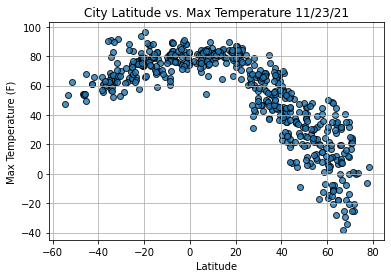

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

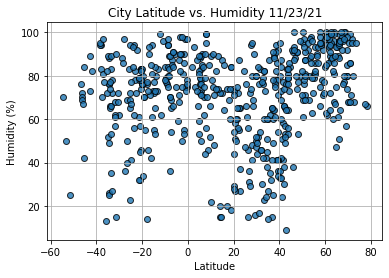

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

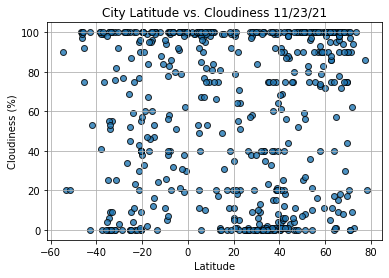

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

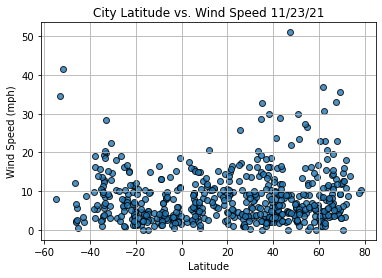

In [19]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

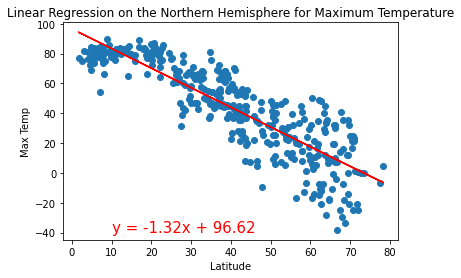

In [53]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Maximum Temperature',
                       'Max Temp',(10,-40))

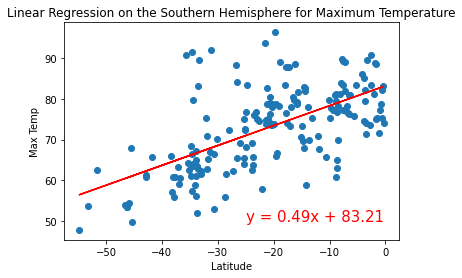

In [52]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Maximum Temperature',
                       'Max Temp',(-25,50))

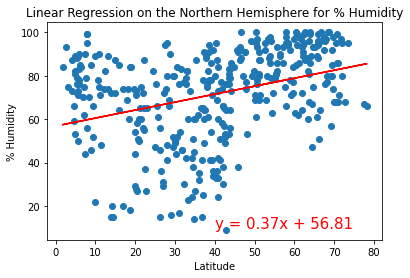

In [51]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for % Humidity',
                       '% Humidity',(40,10))

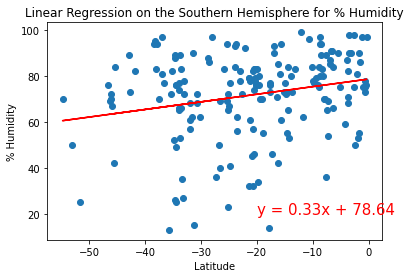

In [50]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for % Humidity',
                       '% Humidity',(-20,20))

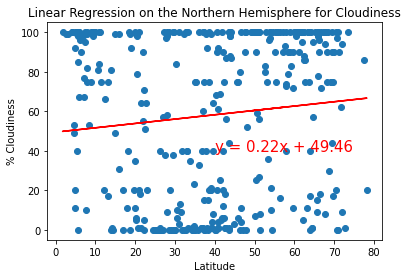

In [55]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Cloudiness',
                       '% Cloudiness',(40,40))

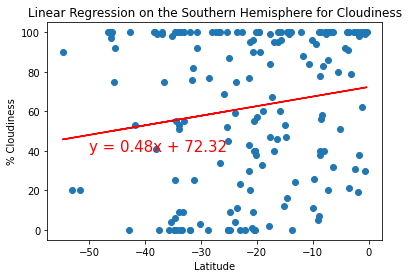

In [57]:
# Linear regression on the Southern Hemisphere.
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere for Cloudiness',
                       '% Cloudiness',(-50,40))

In [ ]:
# Linear regression on the Northern Hemisphere.
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere for Wind Speed',
                       'Wind Speed',(40,40))